# Goal

**Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.**

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#importing machine learning libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [274]:
data_path = 'c:\\Users\\admin\\Downloads\\Projects\\Lead Scoring Model\\'
data = pd.read_csv(data_path + 'Leads.csv')

In [275]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Understanding

In [276]:
print(f"Size of dataset : {data.shape}")

Size of dataset : (9240, 37)


* The dataset has 37 columns in total and lets identify the independent and dependant variables.

In [277]:
print(f"dependant variable or target : Converted")
print(f"independent variables or predictors : \n{data.drop(columns = ['Converted']).columns}")

dependant variable or target : Converted
independent variables or predictors : 
Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Inte

In [278]:
#Removing lead number & prospect id as they are just identifiers for each customer.

data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_16928\4166763864.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [279]:
#Also checking if there are any duplicates and removing them
data.drop_duplicates(inplace = True)

## Null Value Treatment

In [280]:
#treating the columns that has null values
data = data.replace('Select', np.nan)

### City

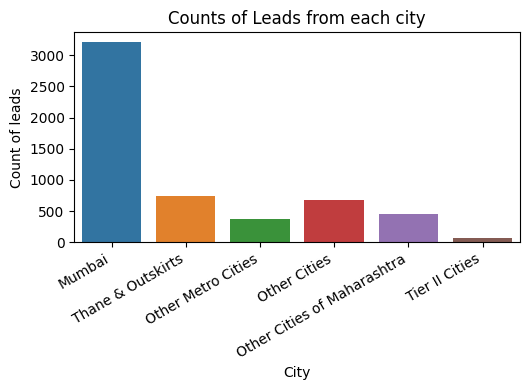

In [281]:
plt.figure(figsize=(10, 4))

#plotting the counts of data points per city
plt.subplot(1,2,1)
ax = sns.countplot(x = 'City', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each city')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

**Inference**
* *Mumbai* is the most common city where the leads came from.

In [282]:
print(f"Total null values in city column : {data['City'].isnull().sum()}")

#replacing the null values in City column with Mumbai as its the most common one.
data['City'].fillna('Mumbai', inplace = True)
print('Treated the null values')

Total null values in city column : 2411
Treated the null values


### Specializations

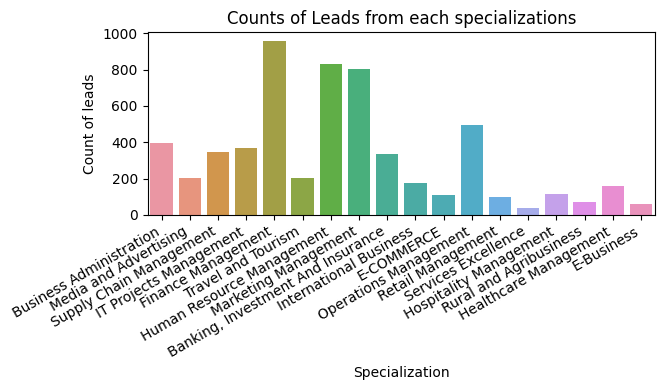

In [283]:
plt.figure(figsize=(12, 4))

#plotting the counts of data points per specializations
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Specialization', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each specializations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [284]:
print(f"Total null values in city column : {data['Specialization'].isnull().sum()}")

#replacing the null values in City column with Others as all of them are nearly same and others can be a new category
data['Specialization'].fillna('Others', inplace = True)
print('Treated the null values')

Total null values in city column : 2190
Treated the null values


### Tags

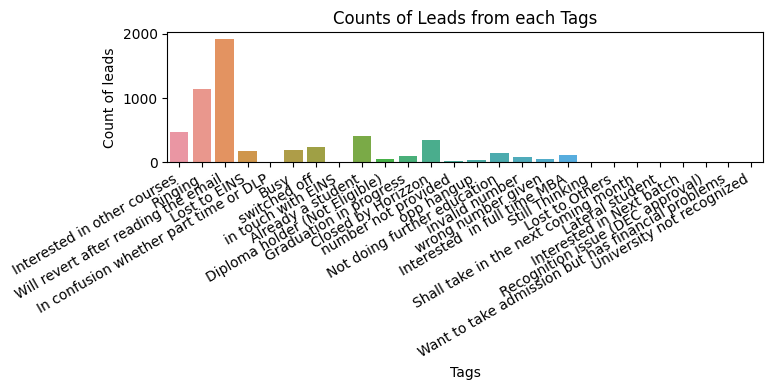

In [285]:
plt.figure(figsize=(14, 4))

#plotting the counts of data points per Tags
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Tags', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each Tags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [286]:
print(f"Total null values in city column : {data['Tags'].isnull().sum()}")

#replacing the null values in City column with most common category
data['Tags'].fillna('Will revert after reading the email', inplace = True)
print('Treated the null values')

Total null values in city column : 2402
Treated the null values


### What matters most to you in choosing a course

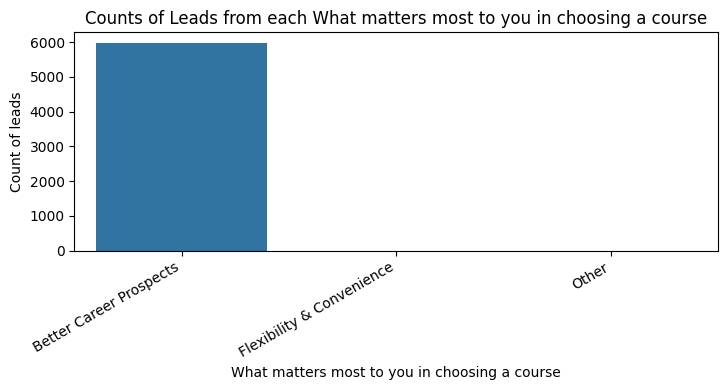

In [287]:
plt.figure(figsize=(14, 4))

#plotting the counts of data points per What matters most to you in choosing a course
plt.subplot(1,2,1)
ax = sns.countplot(x = 'What matters most to you in choosing a course', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each What matters most to you in choosing a course')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [288]:
print(f"Total null values in city column : {data['What matters most to you in choosing a course'].isnull().sum()}")

#replacing the null values in City column with most common category
data['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)
print('Treated the null values')

Total null values in city column : 1970
Treated the null values


### What is your current occupation

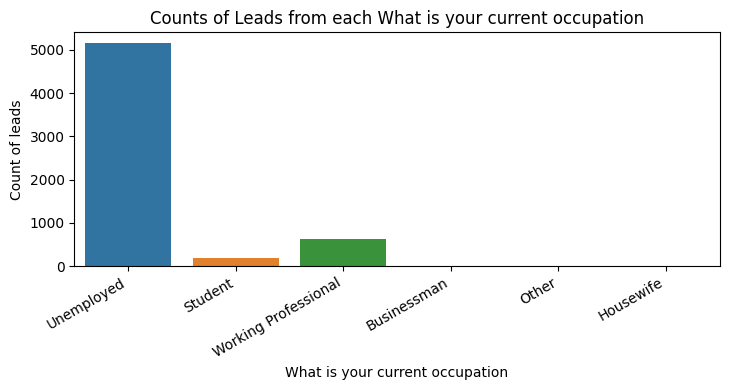

In [289]:
plt.figure(figsize=(14, 4))

#plotting the counts of data points per What is your current occupation
plt.subplot(1,2,1)
ax = sns.countplot(x = 'What is your current occupation', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each What is your current occupation')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [290]:
print(f"Total null values in city column : {data['What is your current occupation'].isnull().sum()}")

#replacing the null values in City column with most common category
data['What is your current occupation'].fillna('Unemployed', inplace = True)
print('Treated the null values')

Total null values in city column : 1951
Treated the null values


### Country

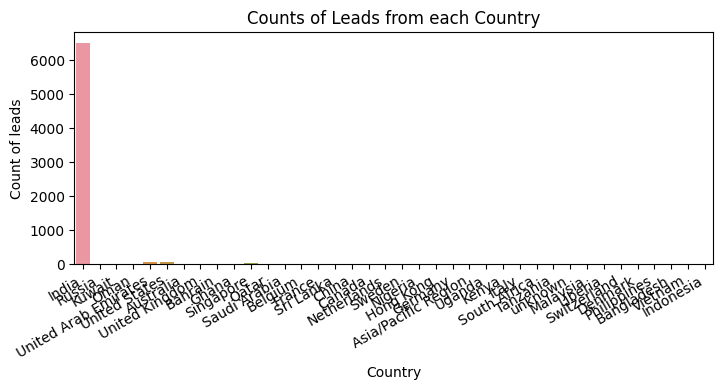

In [291]:
plt.figure(figsize=(14, 4))

#plotting the counts of data points per Country
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Country', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [292]:
print(f"Total null values in city column : {data['Country'].isnull().sum()}")

#replacing the null values in City column with most common category
data['Country'].fillna('India', inplace = True)
print('Treated the null values')

Total null values in city column : 1180
Treated the null values


### Last Activity

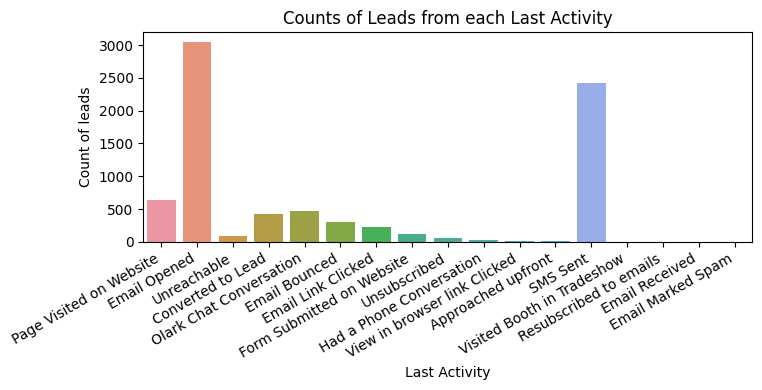

In [293]:
plt.figure(figsize=(14, 4))

#plotting the counts of data points per Country
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Last Activity', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each Last Activity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

In [294]:
print(f"Total null values in city column : {data['Last Activity'].isnull().sum()}")

#replacing the null values in City column with most common category
data['Last Activity'].fillna('Others', inplace = True)
print('Treated the null values')

Total null values in city column : 103
Treated the null values


### Dropping the columns which are having null values greater than 30%

In [295]:
df_null = pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,2))
df_null = df_null.sort_values(by=0,ascending=False)
df_null.rename(columns = {0:'Null%'}, inplace = True)

In [296]:
df_null[df_null['Null%']!=0]

,Null%
How did you hear about X Education,75.00
Lead Profile,71.88
Lead Quality,46.55
Asymmetrique Activity Index,44.16
Asymmetrique Profile Score,44.16
Asymmetrique Activity Score,44.16
Asymmetrique Profile Index,44.16
TotalVisits,1.72
Page Views Per Visit,1.72
Lead Source,0.41


**Inference**
* As per above there are seven features where null% is greater than 30%.
* We can drop such columns as 30% data is missing in them.

In [297]:
#dropping the columns with missing values > 30%
data.drop(columns = ['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Index'], inplace = True)

In [298]:
data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7959.000000,7822.000000,7959.000000,7822.000000
mean,0.399925,4.009460,566.193240,2.749776
std,0.489913,5.016726,551.563569,2.091107
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,102.000000,1.500000
50%,0.000000,3.000000,332.000000,2.000000
75%,1.000000,5.000000,1042.500000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


In [299]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [300]:
data.dropna(inplace = True)

In [301]:
data.shape

(7796, 28)

# Data Preparation & EDA

## Lead Origin

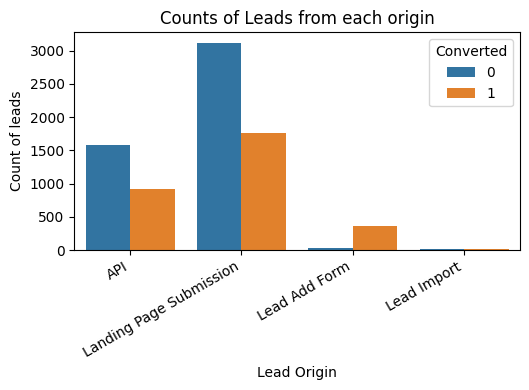

In [302]:
plt.figure(figsize=(10, 4))

#plotting the counts of data points per year
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Lead Origin', hue = 'Converted', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each origin')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()

**Inference**
* API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
* Lead Add Form has more than 90% conversion rate but count of lead are not very high.
* Lead Import are very less in count.

## Lead Source

In [303]:
#There are some inconsistent names in lead source column, correcting them
#Also categorizing the most common sources as 'Others'
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google').replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'],'Others')


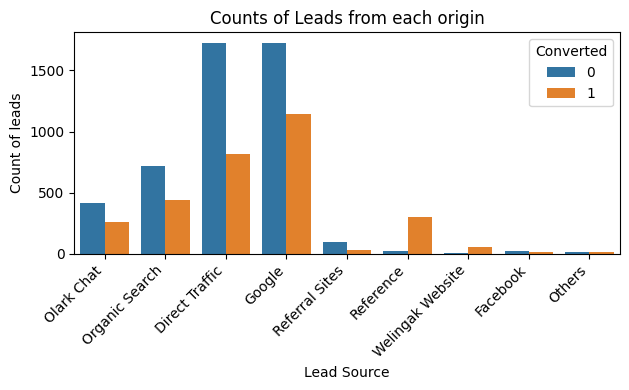

In [304]:
plt.figure(figsize=(12, 4))

#plotting the counts of data points per year
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Lead Source', hue = 'Converted', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from each origin')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Inference**
* *Google and Direct traffic* sources generated the highest leads.
* Leads from *Reference, Welingak website* has the highest conversion rate.

## Do Not Email & Do Not Call

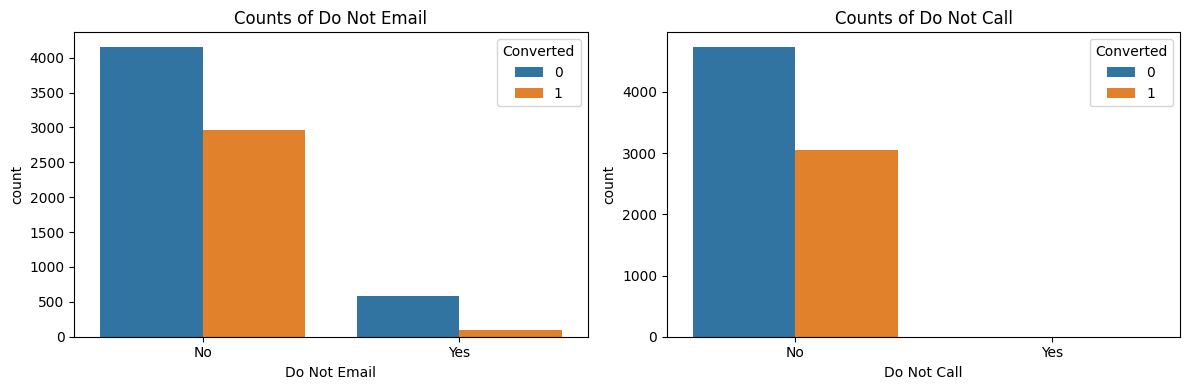

In [305]:
plt.figure(figsize=(12, 4))

#plotting the counts of Do not email
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = data)
plt.title('Counts of Do Not Email')


#plotting the counts of Do not Call
plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = data)
plt.title('Counts of Do Not Call')


plt.tight_layout()
plt.show()

**Inference**
* There are no leads who opted for Do Not Call while there are some users who opted for Do Not Email.

## Last Activity

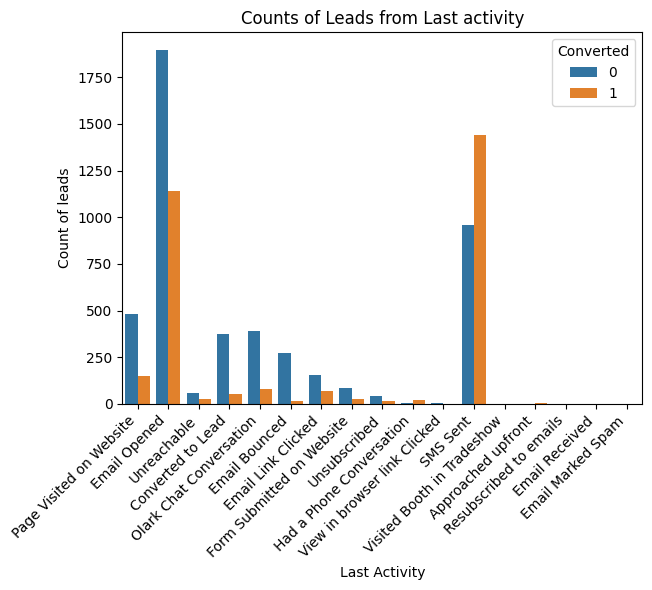

In [306]:
plt.figure(figsize=(12, 6))

#plotting the counts of data points per year
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Last Activity', hue = 'Converted', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from Last activity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Inference**
* *Email Opened* stands out to be highest population among the leads where as with *SMS sent* next.

## Tags

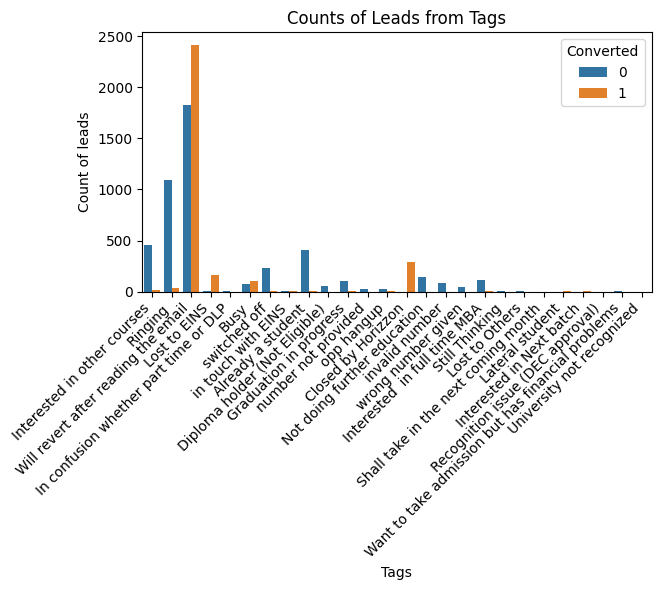

In [307]:
plt.figure(figsize=(12, 6))

#plotting the counts of data points per year
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Tags', hue = 'Converted', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from Tags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [308]:
#As seen above there are some common categories where we can group them as 'Others_tags' keeping the important tags as is.

data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized', 'switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other_Tags')

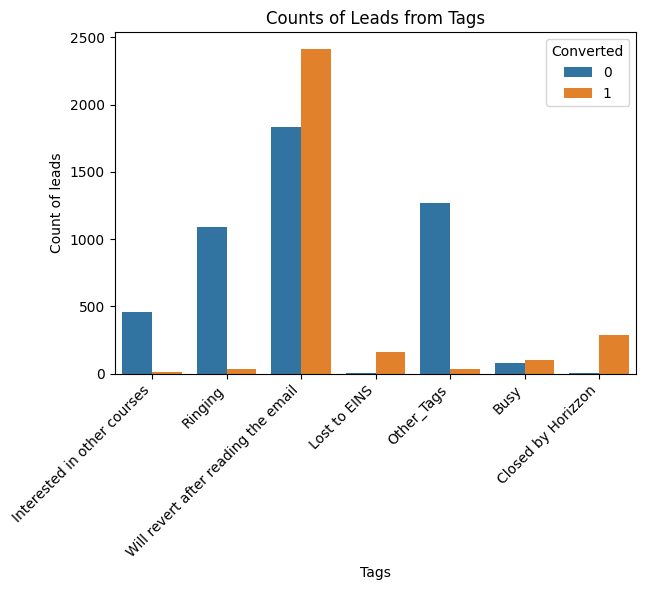

In [309]:
plt.figure(figsize=(12, 6))

#plotting the counts of data points per year
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Tags', hue = 'Converted', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from Tags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Inference**
* There is a very high conversion from users under category *Will revert after reading the email*.

## Last Activity

In [310]:
#There are some categories where we can group them as their sample size is less
#and retain those with considerable population.

data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

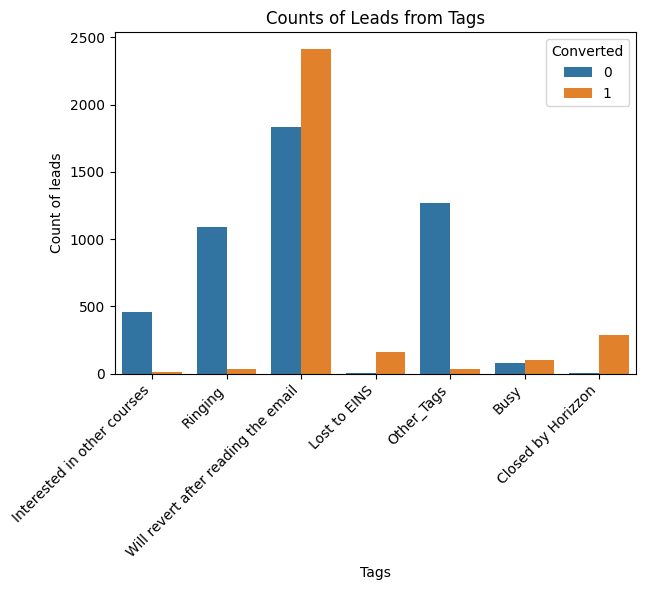

In [311]:
plt.figure(figsize=(12, 6))

#plotting the counts of data points per year
plt.subplot(1,2,1)
ax = sns.countplot(x = 'Tags', hue = 'Converted', data = data)
plt.ylabel('Count of leads')
plt.title('Counts of Leads from Tags')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Box Plot of Continuous Features

Boxplot for : TotalVisits


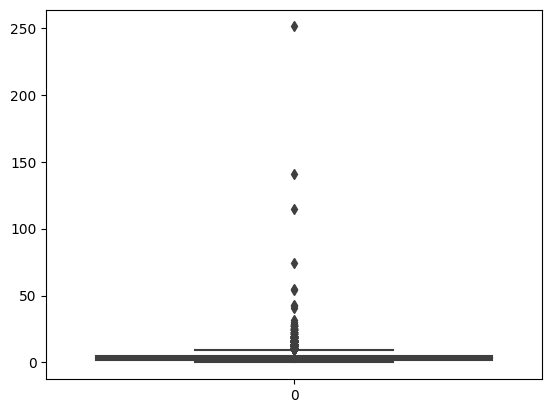

Boxplot for : Total Time Spent on Website


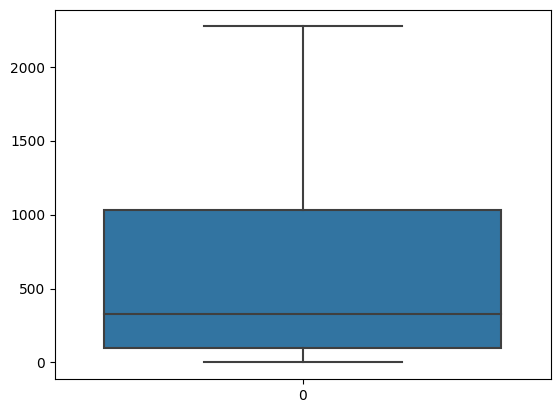

Boxplot for : Page Views Per Visit


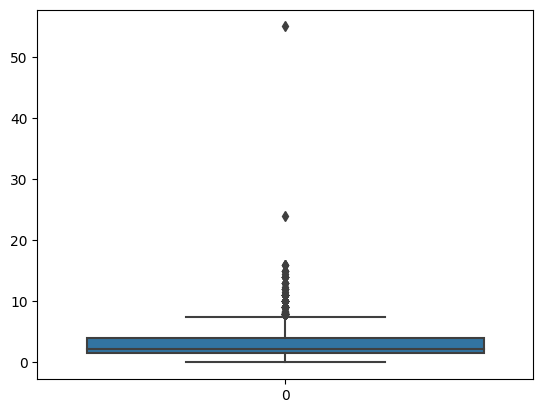

In [312]:
num_cols = ['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']

for i in num_cols:
    print('Boxplot for :',i)
    sns.boxplot(data[i])
    plt.show()

**Inference**
* There are more outliers in *TotalVisits & Page Visits per View*.
* We'll handle these outliers by capping them in either average or with any other function.

## Correlation

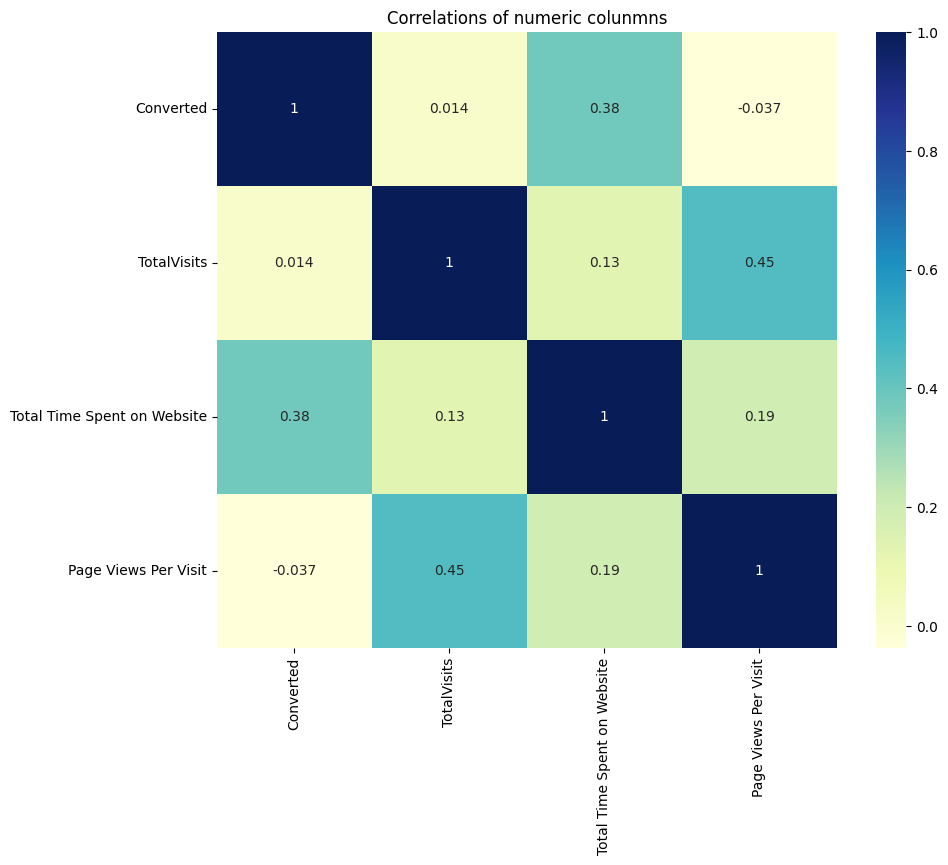

In [313]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.title('Correlations of numeric colunmns')
plt.show()

**Inference**
* We can see that leads who spend more time on website has the high chance for *conversion*.
* Also, *asymmtrique activity score* and *total visits* are negatively correlated meaning one has a negative impact on other.

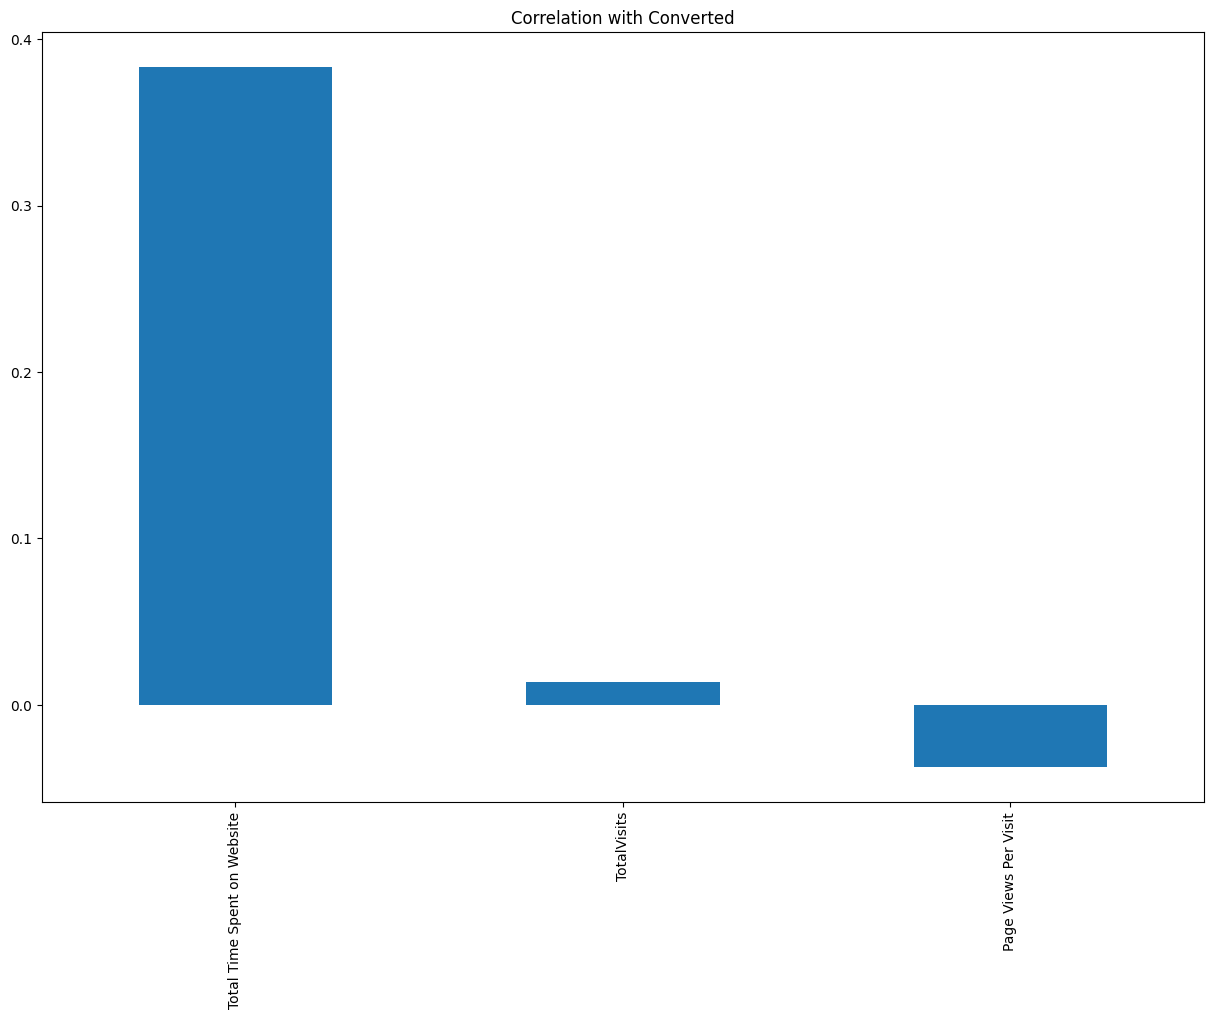

In [314]:
plt.figure(figsize=(15,10))
corr= data.corr(numeric_only=True)
corr['Converted'].sort_values(ascending=False)[1:].plot(kind='bar')

plt.title('Correlation with Converted')
plt.show()

**Inference**
* *Total Time Spent on Website* is highly correlated when compared to other columns.

## Pre-processing the categorical columns

In [315]:
data.select_dtypes(include = ['object']).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [316]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [317]:
#Doing One Hot Encoding on categorical columns
OHE = pd.get_dummies(data[cat_cols], drop_first=True)

#appending the 
data = pd.concat([data.drop(columns = cat_cols), OHE], axis = 1)

In [318]:
data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


# Model Building & Tuning

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Splitting the data into train & test datasets

In [320]:
#Separating the data into dependant and independant variables
X = data.drop(columns = ['Converted'])
y = data['Converted']

In [321]:
#Splitting the data into train and tests keeping 30% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [322]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [323]:
num_cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

## Model building with scikitlearn

In [324]:
#Building the basic logistc regression model first and then optimising it going further

#initializing the model with default parameters
log_reg  = LogisticRegression()
#training the model on train data
log_reg.fit(X_train,y_train)
#making the model to predict on test data
y_pred = log_reg.predict(X_test)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [326]:
#predictions
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Evaluation

In [328]:
print(f"Accuracy we got on initially built model : {metrics.accuracy_score(y_test, y_pred)}")

Accuracy we got on initially built model : 0.42924326635314236


### Building confusion matrix

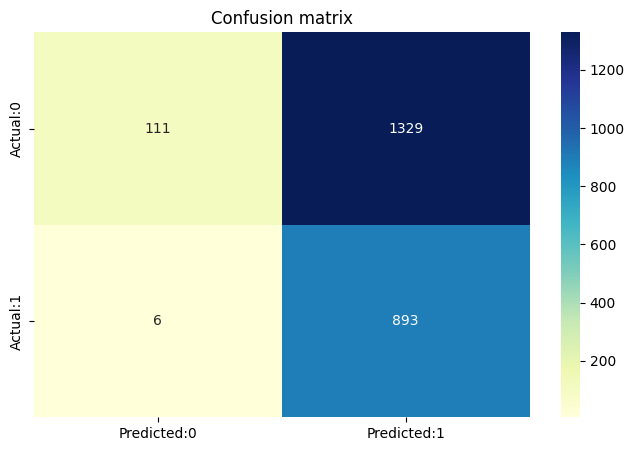

In [330]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

plt.title('Confusion matrix')
plt.show()

In [332]:
#getting the feature importance using already built model
feature_importance=pd.DataFrame({'feature':list(X_train.columns),'feature_importance':[abs(i) for i in log_reg.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False).head(10)

,feature,feature_importance
94,Tags_Lost to EINS,3.854792
96,Tags_Ringing,3.809781
92,Tags_Closed by Horizzon,3.730392
95,Tags_Other_Tags,3.151599
93,Tags_Interested in other courses,2.989798
4,Lead Origin_Lead Add Form,2.296574
14,Do Not Email_Yes,1.383478
13,Lead Source_Welingak Website,1.343964
115,Last Notable Activity_SMS Sent,1.324202
73,Specialization_Others,1.288306


**Inference**
* *Tags, Lead Origin, Lead Source, Lead Notable Activity* are the top 4 features.
* Company should focus on these four features to get the lead conversion to increase significantly.

In [333]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [335]:
acc = (TP+TN)/float(TP+TN+FP+FN)
miss_cls = 1-((TP+TN)/float(TP+TN+FP+FN))
sen = TP/float(TP+FN)
specif = TN/float(TN+FP)
pos_pred = TP/float(TP+FP)
neg_pred = TN/float(TN+FN)
pos_lklyhd_rto = sensitivity/(1-specificity)
neg_lklyhd_rto = ((1-sensitivity)/specificity)

In [336]:
print(f"The acuuracy of the model : {acc}")

print(f"The Miss-classification (1-Accuracy) : {miss_cls}")

print(f"Sensitivity or True Positive Rate (TP / (TP+FN)) : {sen}")

print(f"Specificity or True Negative Rate (TN / (TN+FP)) : {specif}")

print(f"Positive Predictive value (TP / (TP+FP)) : {pos_pred}")

print(f"Negative predictive Value (TN / (TN+FN)) : {neg_pred}")

print(f"Positive Likelihood Ratio (Sensitivity / (1-Specificity)) : {pos_lklyhd_rto}")

print(f"Negative likelihood Ratio ((1-Sensitivity) / Specificity) : {neg_lklyhd_rto}")


The acuuracy of the model : 0.42924326635314236
The Miss-classification (1-Accuracy) : 0.5707567336468576
Sensitivity or True Positive Rate (TP / (TP+FN)) : 0.9933259176863182
Specificity or True Negative Rate (TN / (TN+FP)) : 0.07708333333333334
Positive Predictive value (TP / (TP+FP)) : 0.4018901890189019
Negative predictive Value (TN / (TN+FN)) : 0.9487179487179487
Positive Likelihood Ratio (Sensitivity / (1-Specificity)) : 1.076289933384724
Negative likelihood Ratio ((1-Sensitivity) / Specificity) : 0.08658268947479128


In [337]:
#getting the probabilities of both conversion and non-conversion from log_reg model that we built earlier
y_pred_prob=log_reg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Conversion(0)','Prob of No Conversion (1)'])
y_pred_prob_df.head()

,Prob of Conversion(0),Prob of No Conversion (1)
0,0.000000,1.000000
1,0.000000,1.000000
2,0.000000,1.000000
3,0.000000,1.000000
4,0.000329,0.999671


### Area Under the Curve (AUC)

* Area under the ROC curve usually quantifies the model accuracy in case of classification.
* The higher the area, the greater is the disparity between True and False positives and stronger is the model in classifying the data points in training set.
* An area of 0.5 states that a model is no better than a random classification model.
* Any good classifier should strive to be towards the area of 1 to be ideal.

In [341]:
#selecting best possible threshold on probability to get the best classification results
from sklearn.preprocessing import binarize
for i in range(1,10):
    cm2=0
    y_pred_prob_yes=log_reg.predict_proba(X_test)
    y_pred2=binarize(X = y_pred_prob_yes,threshold = i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
           'accuracy is',(TP+TN)/float(TP+TN+FP+FN),'\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')


With 0.1 threshold the Confusion Matrix is  
 [[  73 1367]
 [   0  899]] 
 with 972 correct predictions and 0 Type II errors( False Negatives) 

 accuracy is 0.42924326635314236 

 Sensitivity:  1.0 Specificity:  0.050694444444444445 



With 0.2 threshold the Confusion Matrix is  
 [[  91 1349]
 [   0  899]] 
 with 990 correct predictions and 0 Type II errors( False Negatives) 

 accuracy is 0.42924326635314236 

 Sensitivity:  1.0 Specificity:  0.06319444444444444 



With 0.3 threshold the Confusion Matrix is  
 [[  96 1344]
 [   2  897]] 
 with 993 correct predictions and 2 Type II errors( False Negatives) 

 accuracy is 0.42924326635314236 

 Sensitivity:  0.9977753058954394 Specificity:  0.06666666666666667 



With 0.4 threshold the Confusion Matrix is  
 [[ 102 1338]
 [   3  896]] 
 with 998 correct predictions and 3 Type II errors( False Negatives) 

 accuracy is 0.42924326635314236 

 Sensitivity:  0.996662958843159 Specificity:  0.07083333333333333 



With 0.5 threshold the

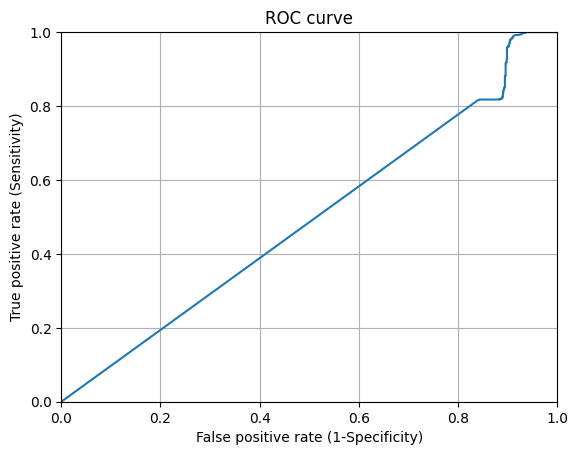

In [339]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

**Inference**
* To visualize the trade-offs between different thresholds is by using an ROC curve.
* It is a plot of *TPR Vs FPR* for all possible choices of thresholds.
* Any model with significant classification accuracy should have more TPs than FPs at all thresholds.
* One can find the optimum position of ROC curve towards the top left corner where the Specificity and Sensitivity are a optimum levels.

In [343]:
print(f"ROC AUC score : {metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])}")

ROC AUC score : 0.4920440149548881


## Model Building using Statsmodel

In [345]:
log_m1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_m1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5457
Model:                            GLM   Df Residuals:                     5343
Model Family:                Binomial   Df Model:                          113
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1451.8
Date:                Fri, 20 Jan 2023   Deviance:                       2903.5
Time:                        20:38:26   Pearson chi2:                 9.10e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5554
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      44.9076   1.84e+05      0.000      1.000   -3.61e+05    3.61e+05
TotalVisits                                                                 0.1323      0.036      3.686      0.000       0.062       0.203
Total Time Spent on Website                                                 1.0618      0.053     20.081      0.000       0.958       1.165
Page Views Per Visit                                                       -0.1590      0.061     -2.616      0.009      -0.278      -0.040
Lead Origin_Landing Page Submission                                        -1.0108      0.185     -5.455      0.000      -1.374      -0.648
Lead Origin_Lead Add Form                                                  23.7313   5.71e+04      0.000      1.000   -1.12e+05    1.12e+05
Lead Origin_Lead Import                                                    26.0414   1.31e+05      0.000      1.000   -2.56e+05    2.56e+05
Lead Source_Facebook                                                      -24.8820   1.31e+05     -0.000      1.000   -2.56e+05    2.56e+05
Lead Source_Google                                                          0.0200      0.149      0.134      0.893      -0.272       0.312
Lead Source_Olark Chat                                                      0.9778      0.240      4.079      0.000       0.508       1.448
Lead Source_Organic Search                                                  0.3288      0.168      1.958      0.050      -0.000       0.658
Lead Source_Others                                                         -0.0384      0.943     -0.041      0.968      -1.886       1.809
Lead Source_Reference                                                     -20.5089   5.71e+04     -0.000      1.000   -1.12e+05    1.12e+05
Lead Source_Referral Sites                                                  0.0505      0.374      0.135      0.893      -0.683       0.784
Lead Source_Welingak Website                                              -18.9512   5.71e+04     -0.000      1.000   -1.12e+05    1.12e+05
Do Not Email_Yes                                                           -1.5849      0.275     -5.755      0.000      -2.125      -1.045
Do Not Call_Yes                                                            17.9857   1.31e+05      0.000      1.000   -2.56e+05    2.56e+05
Last Activity_Email Bounced                                                -0.5846      0.702     -0.833      0.405      -1.961       0.791
Last Activity_Email Link Clicked                                            1.1738      0.526      2.232      0.026       0.143       2.204
Las

In [350]:
#initialize the linear regression model with default variables to build RFE
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#select the top 15 features using RFE
rfe = RFE(estimator = log_reg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

In [351]:
#Top 15 features RFE considered as the most important for building linear regression model
[x for x, y in zip(rfe.feature_names_in_, rfe.support_) if y]

['Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Welingak Website',
 'Do Not Email_Yes',
 'Last Activity_Others',
 'Specialization_Others',
 'What is your current occupation_Unemployed',
 'What is your current occupation_Working Professional',
 'Tags_Closed by Horizzon',
 'Tags_Interested in other courses',
 'Tags_Lost to EINS',
 'Tags_Other_Tags',
 'Tags_Ringing',
 'Last Notable Activity_SMS Sent']

In [352]:
col = X_train.columns[rfe.support_]

In [353]:
X_train = X_train[col]

### Model 1 (With Features selected by RFE)

In [354]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5457
Model:                            GLM   Df Residuals:                     5441
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1541.4
Date:                Fri, 20 Jan 2023   Deviance:                       3082.8
Time:                        20:41:58   Pearson chi2:                 8.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5406
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.2879      0.359      6.371      0.000       1.584       2.992
Total Time Spent on Website                              0.9833      0.049     20.215      0.000       0.888       1.079
Lead Origin_Landing Page Submission                     -1.5150      0.153     -9.920      0.000      -1.814      -1.216
Lead Origin_Lead Add Form                                3.1858      0.468      6.801      0.000       2.268       4.104
Lead Source_Welingak Website                             1.5866      1.168      1.358      0.174      -0.703       3.876
Do Not Email_Yes                                        -1.5823      0.204     -7.758      0.000      -1.982      -1.183
Last Activity_Others                                     1.0105      0.295      3.420      0.001       0.431       1.590
Specialization_Others                                   -1.5566      0.161     -9.667      0.000      -1.872      -1.241
What is your current occupation_Unemployed              -1.4535      0.330     -4.403      0.000      -2.100      -0.806
What is your current occupation_Working Professional     1.0304      0.406      2.537      0.011       0.234       1.826
Tags_Closed by Horizzon                                  4.4358      0.727      6.098      0.000       3.010       5.862
Tags_Interested in other courses                        -3.8769      0.374    -10.360      0.000      -4.610      -3.143
Tags_Lost to EINS                                        4.4300      0.724      6.120      0.000       3.011       5.849
Tags_Other_Tags                                         -3.7029      0.224    -16.555      0.000      -4.141      -3.265
Tags_Ringing                                            -4.3418      0.241    -18.020      0.000      -4.814      -3.870
Last Notable Activity_SMS Sent                           2.2577      0.118     19.156      0.000       2.027       2.489
========================================================================================================================
"""

In [355]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,7.71
1,Lead Origin_Landing Page Submission,5.58
6,Specialization_Others,2.67
2,Lead Origin_Lead Add Form,1.64
8,What is your current occupation_Working Profes...,1.51
14,Last Notable Activity_SMS Sent,1.46
12,Tags_Other_Tags,1.34
13,Tags_Ringing,1.33
9,Tags_Closed by Horizzon,1.23
3,Lead Source_Welingak Website,1.22


**Inference**
* No need to drop any features as all variables are having good VIF.
* We can proceed with making predictions using the same model.

In [356]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

C:\Users\admin\AppData\Local\Temp\ipykernel_16928\772366198.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_pred[:10]


889     0.910548
7511    0.265099
3686    0.782030
840     0.557489
4907    0.007106
664     0.185513
8342    0.024393
638     0.203499
4678    0.187198
3091    0.186492
dtype: float64

In [357]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
889,1,0.910548
7511,0,0.265099
3686,1,0.782030
840,1,0.557489
4907,0,0.007106


In [358]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
889,1,0.910548,1
7511,0,0.265099,0
3686,1,0.782030,1
840,1,0.557489,1
4907,0,0.007106,0


In [359]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3015,  281],
       [ 337, 1824]], dtype=int64)

#### Overall Accuracy

In [361]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8867509620670698


**Inference**
* Very high accuracy is seen with the variables selected by RFE method.

In [363]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [364]:
acc = (TP+TN)/float(TP+TN+FP+FN)
miss_cls = 1-((TP+TN)/float(TP+TN+FP+FN))
sen = TP/float(TP+FN)
specif = TN/float(TN+FP)
pos_pred = TP/float(TP+FP)
neg_pred = TN/float(TN+FN)
pos_lklyhd_rto = sensitivity/(1-specificity)
neg_lklyhd_rto = ((1-sensitivity)/specificity)

print(f"The acuuracy of the model : {acc}")

print(f"The Miss-classification (1-Accuracy) : {miss_cls}")

print(f"Sensitivity or True Positive Rate (TP / (TP+FN)) : {sen}")

print(f"Specificity or True Negative Rate (TN / (TN+FP)) : {specif}")

print(f"Positive Predictive value (TP / (TP+FP)) : {pos_pred}")

print(f"Negative predictive Value (TN / (TN+FN)) : {neg_pred}")

print(f"Positive Likelihood Ratio (Sensitivity / (1-Specificity)) : {pos_lklyhd_rto}")

print(f"Negative likelihood Ratio ((1-Sensitivity) / Specificity) : {neg_lklyhd_rto}")


The acuuracy of the model : 0.8867509620670698
The Miss-classification (1-Accuracy) : 0.11324903793293017
Sensitivity or True Positive Rate (TP / (TP+FN)) : 0.8440536788523831
Specificity or True Negative Rate (TN / (TN+FP)) : 0.914745145631068
Positive Predictive value (TP / (TP+FP)) : 0.8665083135391924
Negative predictive Value (TN / (TN+FN)) : 0.8994630071599046
Positive Likelihood Ratio (Sensitivity / (1-Specificity)) : 9.900359165471375
Negative likelihood Ratio ((1-Sensitivity) / Specificity) : 0.17048062172555395


In [366]:
#function to get the roc curve
def get_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [367]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

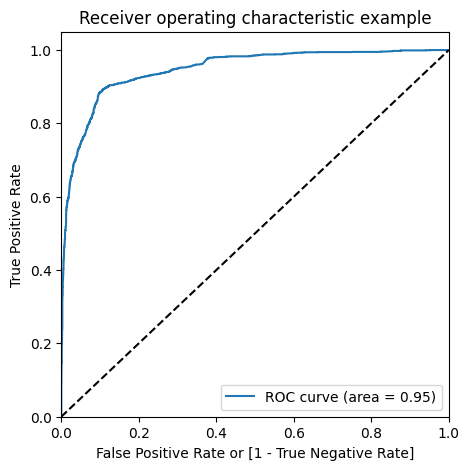

In [368]:
get_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [369]:
#making dataframe of thresholds
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
889,1,0.910548,1,1,1,1,1,1,1,1,1,1,1
7511,0,0.265099,0,1,1,1,0,0,0,0,0,0,0
3686,1,0.782030,1,1,1,1,1,1,1,1,1,0,0
840,1,0.557489,1,1,1,1,1,1,1,0,0,0,0
4907,0,0.007106,0,1,0,0,0,0,0,0,0,0,0


In [370]:
#Getting probability, accuracy, sensitivity, specificity
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.396005  1.000000  0.000000
0.1   0.1  0.757009  0.979176  0.611347
0.2   0.2  0.818215  0.937066  0.740291
0.3   0.3  0.880887  0.905137  0.864988
0.4   0.4  0.892065  0.886627  0.895631
0.5   0.5  0.886751  0.844054  0.914745
0.6   0.6  0.877222  0.793614  0.932039
0.7   0.7  0.860729  0.708006  0.960862
0.8   0.8  0.840022  0.628413  0.978762
0.9   0.9  0.802639  0.519204  0.988471


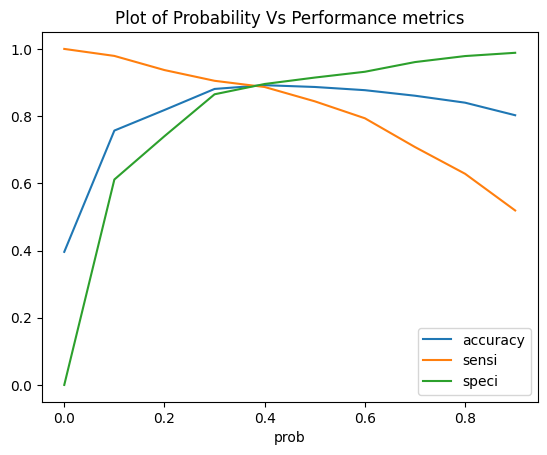

In [372]:
#plotting the accuracy, sensitivity, specificity Vs Probability
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.title('Plot of Probability Vs Performance metrics')
plt.show()

**Inference**
* From above cure, we can see that 0.4 is the optimum point to take it as a cutoff probability.

In [373]:
#Classifying the leads to 0/1 based on the threshold we found earlier i.e 0.4
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
889,1,0.910548,1,1,1,1,1,1,1,1,1,1,1,1
7511,0,0.265099,0,1,1,1,0,0,0,0,0,0,0,0
3686,1,0.782030,1,1,1,1,1,1,1,1,1,0,0,1
840,1,0.557489,1,1,1,1,1,1,1,0,0,0,0,1
4907,0,0.007106,0,1,0,0,0,0,0,0,0,0,0,0


In [374]:
print(f"Accuracy Score : {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}")

Accuracy Score : 0.8920652373098772


**Inference**
* Accuracy got increased a bit compared to earlier score.

In [375]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2952,  344],
       [ 245, 1916]], dtype=int64)

In [376]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Accuracy

In [378]:
print(f"Accuracy : {((TP + TN)/(TP+TN+FP+FN))*100}")

Accuracy : 89.20652373098773


#### Sensitivity

In [379]:
print(f"Sensitivity : {(TP/(TP+FN))*100}")

Sensitivity : 88.66265617769551


#### Specificity

In [380]:
print(f"Specificity : {(TN/(TN+FP))*100}")

Specificity : 89.56310679611651


# Model Interpretation

* After running the model on the Test Data these are the figures we obtain:

    * **Accuracy** : 89.20%
    * **Sensitivity** : 88.66%
    * **Specificity** : 89.56%  
<br>
* While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
* Accuracy, Sensitivity and Specificity values of test set are approximately closer to the respective values calculated using trained set.
* Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
* Hence overall this model seems to be good.

# Conclusion

It was found that the variables that mattered the most in the potential leads are (In descending order) :

* The total time spend on the Website.
* Total number of visits.
* When the lead source was:
    * Google
    * Direct traffic
    * Organic search
    * Welingak website
* When the last activity was:
    * SMS
    * Olark chat conversation
* When the lead origin is Lead add format.
* When their current occupation is as a working professional.

Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.